<a href="https://www.kaggle.com/code/csedsa20bd6755/chest-x-ray-pneumonia-prediction-cnn?scriptVersionId=208750995" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image

import os
"""for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))"""

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [2]:
os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/PNEUMONIA')

['person1180_virus_2010.jpeg',
 'person1230_virus_2081.jpeg',
 'person1513_virus_2632.jpeg',
 'person124_virus_238.jpeg',
 'person746_virus_1369.jpeg',
 'person588_bacteria_2422.jpeg',
 'person466_virus_960.jpeg',
 'person1590_bacteria_4175.jpeg',
 'person399_bacteria_1805.jpeg',
 'person59_bacteria_279.jpeg',
 'person57_bacteria_270.jpeg',
 'person600_bacteria_2456.jpeg',
 'person1527_virus_2661.jpeg',
 'person1418_bacteria_3636.jpeg',
 'person622_bacteria_2494.jpeg',
 'person1361_bacteria_3476.jpeg',
 'person494_virus_1000.jpeg',
 'person97_virus_180.jpeg',
 'person1689_bacteria_4472.jpeg',
 'person437_bacteria_1884.jpeg',
 'person74_bacteria_361.jpeg',
 'person1338_bacteria_3397.jpeg',
 'person114_virus_217.jpeg',
 'person300_bacteria_1421.jpeg',
 'person1197_virus_2039.jpeg',
 'person1585_bacteria_4151.jpeg',
 'person412_bacteria_1827.jpeg',
 'person318_bacteria_1474.jpeg',
 'person1519_virus_2646.jpeg',
 'person332_virus_685.jpeg',
 'person579_bacteria_2381.jpeg',
 'person888_viru

In [3]:
import os
os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL')

['NORMAL2-IM-0771-0001.jpeg',
 'NORMAL2-IM-1294-0001-0002.jpeg',
 'IM-0675-0001.jpeg',
 'NORMAL2-IM-1169-0001.jpeg',
 'IM-0421-0001.jpeg',
 'NORMAL2-IM-0531-0001.jpeg',
 'NORMAL2-IM-0416-0001-0002.jpeg',
 'NORMAL2-IM-0965-0001.jpeg',
 'NORMAL2-IM-0627-0001.jpeg',
 'NORMAL2-IM-0997-0001.jpeg',
 'NORMAL2-IM-0757-0001.jpeg',
 'IM-0629-0001-0002.jpeg',
 'IM-0588-0001.jpeg',
 'IM-0713-0001.jpeg',
 'NORMAL2-IM-0696-0001.jpeg',
 'NORMAL2-IM-0808-0001.jpeg',
 'NORMAL2-IM-1126-0001.jpeg',
 'IM-0701-0001.jpeg',
 'NORMAL2-IM-1046-0001.jpeg',
 'IM-0304-0001.jpeg',
 'NORMAL2-IM-0385-0001.jpeg',
 'NORMAL2-IM-0908-0001.jpeg',
 'NORMAL2-IM-1301-0001.jpeg',
 'NORMAL2-IM-0428-0001.jpeg',
 'NORMAL2-IM-1318-0001.jpeg',
 'IM-0626-0001-0001.jpeg',
 'NORMAL2-IM-0399-0001.jpeg',
 'IM-0452-0001.jpeg',
 'IM-0672-0001.jpeg',
 'IM-0314-0001.jpeg',
 'NORMAL2-IM-0578-0001.jpeg',
 'NORMAL2-IM-1171-0001.jpeg',
 'NORMAL2-IM-1401-0001.jpeg',
 'IM-0313-0001.jpeg',
 'IM-0461-0001.jpeg',
 'IM-0578-0001.jpeg',
 'IM-0613-00

In [4]:
def Load_Images(path):
    folders = os.listdir(path)
    data = []
    label = []
    print(folders)
    if '.DS_Store' in folders:
        folders.remove('.DS_Store')
    print(folders)
    for i in folders:
        images = os.listdir(path + '/' + i)
        if '.DS_Store' in images:
            images.remove('.DS_Store')
        for j in images:
            im = Image.open(path + '/' + i + '/' + j).convert('RGB')
            im = im.resize((32, 32), Image.NEAREST)
            ar = np.array(im)
            data.append(ar)
            label.append(i)
    t = pd.factorize(np.array(label))
    tgt = t[0]
    return np.array(data), tgt

In [5]:
os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train')

['PNEUMONIA', 'NORMAL', '.DS_Store']

In [6]:
import warnings
warnings.filterwarnings('ignore')

train_x,train_y = Load_Images('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train')

['PNEUMONIA', 'NORMAL', '.DS_Store']
['PNEUMONIA', 'NORMAL']


In [7]:
train_x.shape,train_y.shape

((5216, 32, 32, 3), (5216,))

In [8]:
from keras.models import Sequential 
from keras.layers import Conv2D,Dense, Flatten, AveragePooling2D, Dropout 
model = Sequential()
model.add(Conv2D(filters = 6, kernel_size = (5, 5), activation = 'tanh', input_shape = train_x.shape[1:]))
model.add(AveragePooling2D())
model.add(Conv2D(filters = 16, kernel_size = (5, 5), activation = 'tanh'))
model.add(AveragePooling2D())
model.add(Conv2D(filters = 120, kernel_size = (5,5),activation = 'tanh'))
model.add(Flatten())
model.add(Dense(units = 84, activation = 'tanh'))
model.add(Dense(units = 10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                1

In [9]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [10]:
model.fit(train_x, train_y, epochs = 15)

Epoch 1/15
163/163 [==============================] - 7s 2ms/step - loss: 0.3477 - accuracy: 0.8583
Epoch 2/15
163/163 [==============================] - 0s 2ms/step - loss: 0.1809 - accuracy: 0.9266
Epoch 3/15
163/163 [==============================] - 0s 2ms/step - loss: 0.1706 - accuracy: 0.9306
Epoch 4/15
163/163 [==============================] - 0s 2ms/step - loss: 0.1668 - accuracy: 0.9339
Epoch 5/15
163/163 [==============================] - 0s 2ms/step - loss: 0.1478 - accuracy: 0.9411
Epoch 6/15
163/163 [==============================] - 0s 2ms/step - loss: 0.1403 - accuracy: 0.9450
Epoch 7/15
163/163 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9473
Epoch 8/15
163/163 [==============================] - 0s 2ms/step - loss: 0.1406 - accuracy: 0.9471
Epoch 9/15
163/163 [==============================] - 0s 2ms/step - loss: 0.1230 - accuracy: 0.9534
Epoch 10/15
163/163 [==============================] - 0s 2ms/step - loss: 0.1312 - accuracy: 0.9498

In [11]:
test_x,test_y = Load_Images('/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test')

['PNEUMONIA', 'NORMAL', '.DS_Store']
['PNEUMONIA', 'NORMAL']


In [12]:
model.evaluate(test_x,test_y)

20/20 [==============================] - 0s 3ms/step - loss: 0.9554 - accuracy: 0.7340


[0.9554044008255005, 0.7339743375778198]

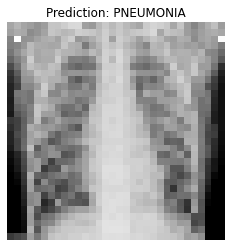

In [13]:
test_x = test_x / 255.0  
predictions = model.predict(test_x)  

class_names = ['PNEUMONIA', 'NORMAL']  
predicted_classes = [class_names[np.argmax(pred)] for pred in predictions]


index = 0
plt.imshow(test_x[index])
plt.title(f"Prediction: {predicted_classes[index]}")
plt.axis('off')
plt.show()